# Visualization
In this notebook, we will introduce the different types of visualization available in tnetwork. 

There are two types: visualization of graphs at particular time (e.g., a particular snapshot), and visualization of the evolution of the community structure (longitudinal visualization)

If tnerwork library is not installed, you need to install it, for instance using the following command

In [2]:
#%%capture #avoid printing output
#!pip install --upgrade git+https://github.com/Yquetzal/tnetwork.git

In [3]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import seaborn as sns
import pandas as pd
import networkx as nx
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's start with a toy example generated using tnetwork generator (see the corresponding documentation for details)

In [16]:
my_scenario = tn.ComScenario()
[com1,com2] = my_scenario.INITIALIZE([6,6],["c1","c2"])
(com2,com3)=my_scenario.THESEUS(com2,wait=20)
my_scenario.DEATH(com2,wait=10)

(generated_network_IG,generated_comunities_IG) = my_scenario.run()

100% (8 of 8) |##########################| Elapsed Time: 0:00:00 ETA:  00:00:00

## Cross-section visualization
One way to see a dynamic graph is to plot it as a series of standard static graph.
We can start by plotting a single graph at a single time.

We made the choice of using Bokeh as a visualization tool. There are 2 reasons for that: 1)In many cases, it is useful to have an interactive visualization instead of a static picture 2) If one prefer to use networkx visualization tool, it is straightforward to use it by requesting to tnetwork the graph at the desired time.

The weaknesses of Bokeh ares that:
* It can alter the responsiveness of the netbook if large visualization are embedded in it
* In some online notebooks e.g., google colab, embedding bokeh pictures in the notebook is not optimal.

As a consequence, it is recommended to embed bokeh visualization in notebooks only for small graphs, and to open them in new windows for larger ones.

Let's start by plotting the networks in timestep 1 (ts=1).
We use the auto_show option to plot directly, without need of manually setting up the visualization with bokeh.
We can also set the size of the figure suing width and height options

In [17]:
tn.plot_as_graph(generated_network_IG,ts=1,auto_show=True,width=600,height=300)

Loading BokehJS ...

Row(id='2605', ...)

One can plot in a new window (and/or in a file) by ignoring the auto_show option, and instead receiving a figure, that we can manipulate as usual with bokeh

In [19]:
from bokeh.plotting import figure, output_file, show
fig = tn.plot_as_graph(generated_network_IG,ts=1,width=600,height=300)
output_file("fig.html")
show(fig)

Instead of plotting a single graph, we can plot several ones in a single call. Note that in this case, the position of nodes is common to all plots, and is decided based on the cumulated network

In [26]:
from bokeh.plotting import figure, output_file, show
fig = tn.plot_as_graph(generated_network_IG,ts=[1,30,60,80,generated_network_IG.end()-1],auto_show=True,width=200,height=300)

Loading BokehJS ...

If we have dynamic communities associated with this dynamic graph, we can plot them too. Note that the same function accepts snapshots and interval graphs, but both the graph and the community structure must have the same format (SN or IG) 

In [27]:
from bokeh.plotting import figure, output_file, show
fig = tn.plot_as_graph(generated_network_IG,generated_comunities_IG,ts=[1,30,60,80,generated_network_IG.end()-1],auto_show=True,width=200,height=300)

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Loading BokehJS ...

### Longitudinal Visualization
The second type of visualization plots only nodes and not edges.

Time corresponds to the x axis, while each node has a fixed position on the y axis. 

It is possible to plot only a dynamic graphs, without communities. White means that the node is not present or has no edges

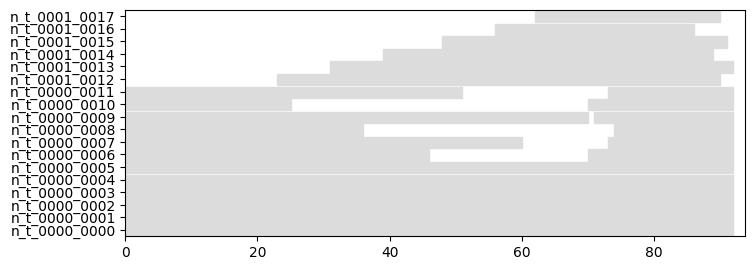

In [30]:
tn.plot_longitudinal(generated_network_IG,height=300)


Or only communities, without a graph:

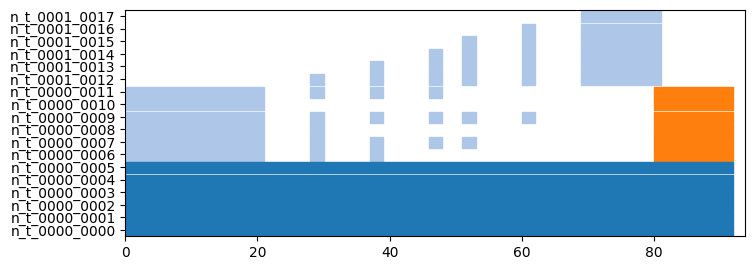

In [31]:
tn.plot_longitudinal(communities=generated_comunities_IG,height=300)

Or both on the same graph. The grey color always corresponds to nodes whithout communities. Other colors corresponds to communities

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


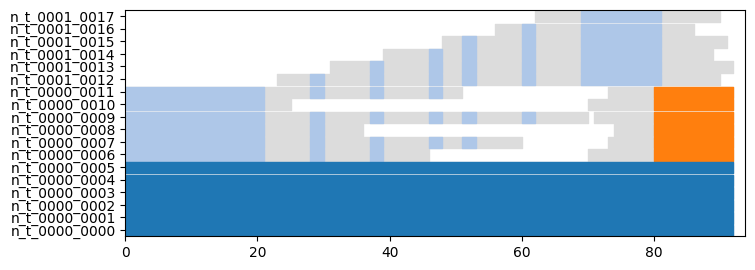

In [32]:
tn.plot_longitudinal(generated_network_IG,communities=generated_comunities_IG,height=300)

It is possible to plot only a subset of nodes, and/or to plot them in a particular order

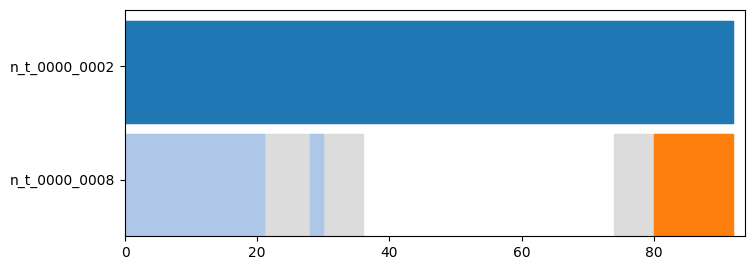

In [36]:
tn.plot_longitudinal(generated_network_IG,communities=generated_comunities_IG,height=300,nodes=["n_t_0000_0008","n_t_0000_0002"])

### Timestamps
It is common, when manipulating real data, to have dates in the form of timestamps. There is an option to automatically transform timestamps to dates on the x axis : `to_datetime`

We give an example using the sociopatterns dataset

In [37]:
sociopatterns = tn.DynGraphSN.graph_socioPatterns2012()

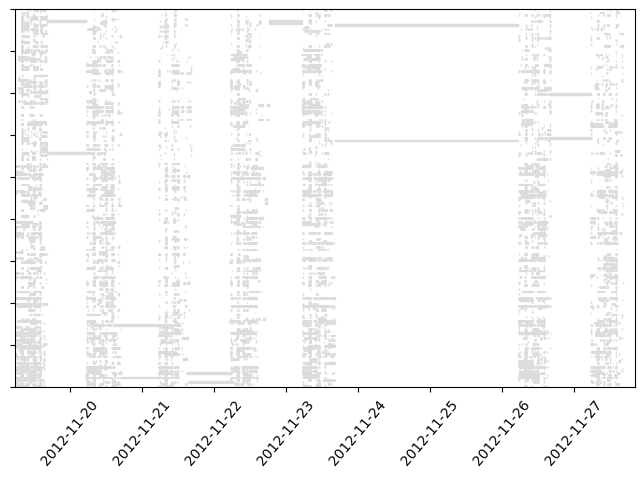

In [47]:
#It takes some a few seconds
to_plot_SN = tn.plot_longitudinal(sociopatterns,height=500,to_datetime=True)

### snapshot duration
By default, snapshots last until the next snapshot. If snapshots have a fix duration, there is a parameter to indicate this duration : `sn_duration`

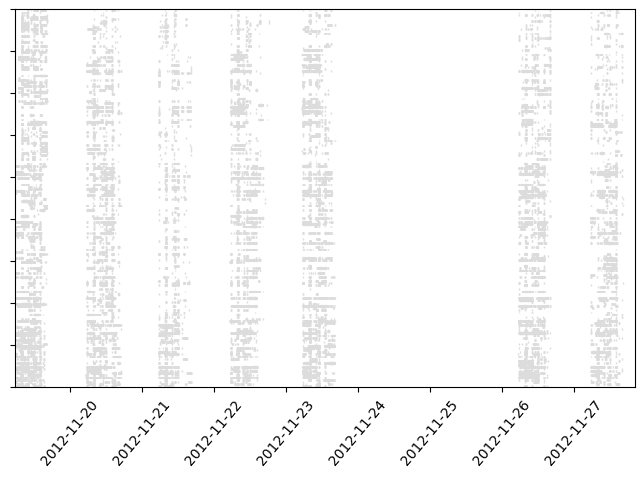

In [48]:
#in sociopatterns, there is an observed snapshot every 20 seconds.
to_plot_SN = tn.plot_longitudinal(sociopatterns,height=500,to_datetime=True,sn_duration=20)

### Bokeh longitudinal plots
Longitudinal plots can also use bokeh. It is clearly interesting to have ineractive plots in order to zoom on details or to check the name of communities or nodes. However, bokeh plots with large number of elements can quickly become unresponsive, that is why there are not used by default. 

By adding the parameter `bokeh=True`, you can obtain a bokeh plot exactly like for the cross-section graphs, with or without the `auto_show` option.

In [49]:
tn.plot_longitudinal(generated_network_IG,communities=generated_comunities_IG,height=300,bokeh=True,auto_show=True)

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Loading BokehJS ...

In [52]:
from bokeh.plotting import figure, output_file, show
fig = tn.plot_longitudinal(sociopatterns,bokeh=True)
output_file("fig.html")
show(fig)